In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Parameters
initial_temperature = 100
cooling = 0.95  
upper_bound = 1
lower_bound = 0
epsilon = 1e-6  # small value to exclude exact boundary values

y = np.linspace(lower_bound+epsilon,upper_bound-epsilon,num=100,endpoint=False)
x = y + epsilon
X,Y = np.meshgrid(x,y)

def objective_function(solution, a, b):
    x, y = solution
    return -((2.18**2 + b**2)+(2.18 - 2.18**2)*x+(a - b**2)*y**2 + 
             (a - b**2)*(x-y)**2)+((1.0 - x)*np.log((1.0 - x)/10.0)+x*np.log(x)+
             y * np.log(y) + (x - y) * np.log(x - y) + 
             (2.18**2 * (1.0 - x) + b**2 * (1.0 - y**2 - (x - y)**2)) / 2.0)

# Simulated Annealing function
def simulated_annealing(a, b):
    #best_x, best_y = x[0],y[0]
    #best_value = objective_function((best_x,best_y),a,b)
    #current_temperature = initial_temperature
    
    #while current_temperature > 0.1:
        new_value_grid = objective_function((X,Y),a,b)
        new_value = np.nanmin(new_value_grid)
        #delta_value = new_value - best_value
        
        #if delta_value < 0 or np.random.random() < np.exp(delta_value / current_temperature):
        best_value = new_value
        best_x = x[np.where(new_value_grid==best_value)[1]][0]
        best_y = y[np.where(new_value_grid==best_value)[0]][0]
        
        #current_temperature *= cooling

        return best_x, best_y, best_value


# Loop over a and b values and run Simulated Annealing for each case again with updated bounds
a_values = np.linspace(0, 5, 100)
b_values = np.linspace(0, 2.5, 100)

best_x_list=[]
best_y_list=[]
best_value_list=[]
a_list = []
b_list = []

for a in tqdm(a_values):
    for b in b_values:
        best_x, best_y, best_value = simulated_annealing(a, b)
        best_x_list.append(best_x)
        best_y_list.append(best_y)
        best_value_list.append(best_value)
        a_list.append(a)
        b_list.append(b)

  0%|                                                                                                                                           | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_3802263/2749124681.py:22: RuntimeWarning: invalid value encountered in log
  y * np.log(y) + (x - y) * np.log(x - y) +
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.78it/s]


In [52]:
Z = objective_function((X,Y),0,0)
Z

/tmp/ipykernel_3802263/230090921.py:20: RuntimeWarning: invalid value encountered in log
  y * np.log(y) + (x - y) * np.log(x - y) +


array([[-4.67883597, -4.75587198, -4.80510831, ..., -2.41926552,
        -2.34782797, -2.27095386],
       [        nan, -4.75587198, -4.8189617 , ..., -2.47495059,
        -2.40361614, -2.32684407],
       [        nan,         nan, -4.80510831, ..., -2.5166781 ,
        -2.44544781, -2.36877884],
       ...,
       [        nan,         nan,         nan, ..., -2.41926552,
        -2.40361614, -2.36877884],
       [        nan,         nan,         nan, ...,         nan,
        -2.34782797, -2.32684407],
       [        nan,         nan,         nan, ...,         nan,
                nan, -2.27095386]])

In [56]:
objective_function((x[0],y[0]),0,0)

-4.67883597116973

In [57]:
np.where(Z==objective_function((x[1],y[0]),0,0))

(array([0, 1]), array([1, 1]))

<Axes: >

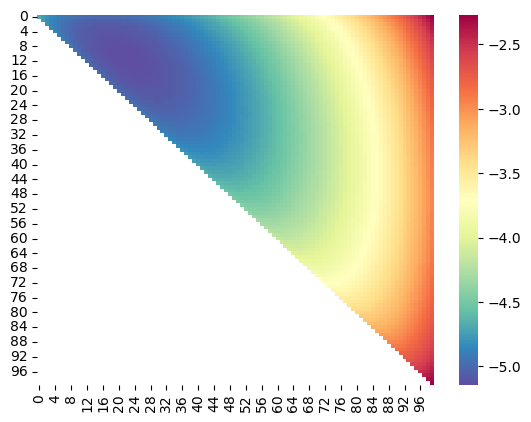

In [23]:
sns.heatmap(Z,cmap='Spectral_r')

In [14]:
np.nanmin(Z)

-5.141560774539515

In [15]:
np.where(Z==np.nanmin(Z))

(array([11]), array([22]))

In [24]:
x[22]

0.22000155999999998

In [25]:
y[11]

0.11000077999999999

In [27]:
objective_function((x[11],y[]),0,0)

/tmp/ipykernel_3802263/445188958.py:22: RuntimeWarning: invalid value encountered in log
  y * np.log(y) + (x - y) * np.log(x - y) +


nan

In [18]:
X

array([[2.0000000e-06, 1.0001980e-02, 2.0001960e-02, ..., 9.7000006e-01,
        9.8000004e-01, 9.9000002e-01],
       [2.0000000e-06, 1.0001980e-02, 2.0001960e-02, ..., 9.7000006e-01,
        9.8000004e-01, 9.9000002e-01],
       [2.0000000e-06, 1.0001980e-02, 2.0001960e-02, ..., 9.7000006e-01,
        9.8000004e-01, 9.9000002e-01],
       ...,
       [2.0000000e-06, 1.0001980e-02, 2.0001960e-02, ..., 9.7000006e-01,
        9.8000004e-01, 9.9000002e-01],
       [2.0000000e-06, 1.0001980e-02, 2.0001960e-02, ..., 9.7000006e-01,
        9.8000004e-01, 9.9000002e-01],
       [2.0000000e-06, 1.0001980e-02, 2.0001960e-02, ..., 9.7000006e-01,
        9.8000004e-01, 9.9000002e-01]])

In [29]:
df1 = pd.DataFrame(a_list,columns=['a'])
df1['b'] = pd.DataFrame(b_list,columns=['b'])
df1['best_x'] = pd.DataFrame(best_x_list,columns=['best_x'])
df1['best_y'] = pd.DataFrame(best_y_list,columns=['best_y'])
df1['best_value'] = pd.DataFrame(best_value_list,columns=['best_value'])
df1

,a,b,best_x,best_y,best_value
0,0.0,0.000000,0.220002,0.110001,-5.141561
1,0.0,0.025253,0.220002,0.110001,-5.141872
2,0.0,0.050505,0.220002,0.110001,-5.142805
3,0.0,0.075758,0.220002,0.110001,-5.144361
4,0.0,0.101010,0.220002,0.110001,-5.146539
...,...,...,...,...,...
9995,5.0,2.398990,0.280001,0.140001,-8.083365
9996,5.0,2.424242,0.280001,0.140001,-8.141878
9997,5.0,2.449495,0.280001,0.140001,-8.201002
9998,5.0,2.474747,0.270001,0.130001,-8.260774


<Axes: >

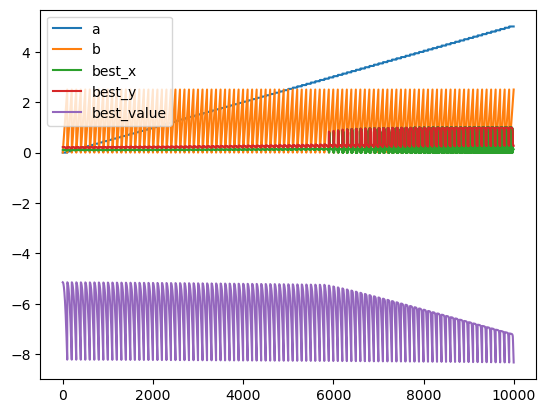

In [6]:
df1.plot()

In [37]:
df1.to_csv('simulated_anneling_results.csv',index=False)

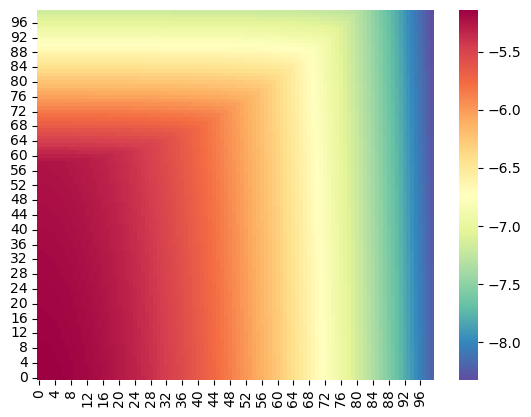

In [30]:
Z = np.reshape(df1['best_value'].values,(100,100))
ax = sns.heatmap(Z,cmap='Spectral_r')
ax.invert_yaxis()

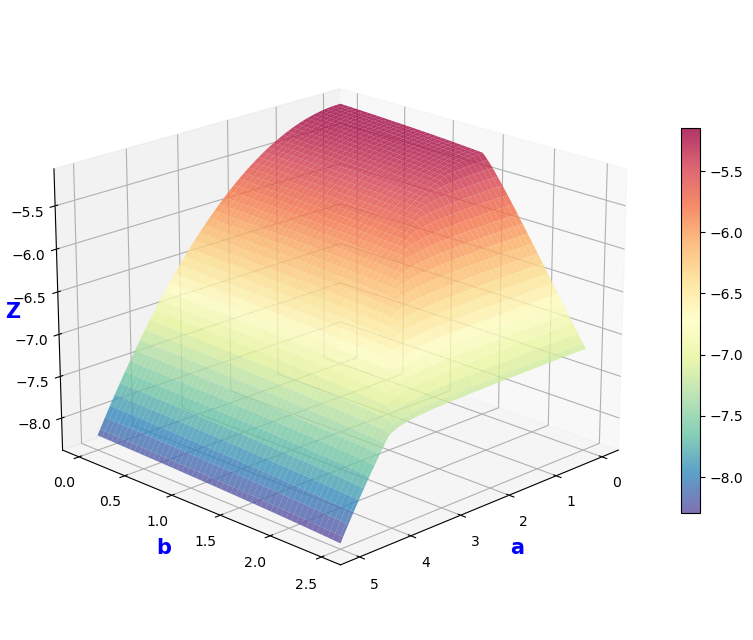

In [31]:
a_grid,b_grid = np.meshgrid(a_values,b_values)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(a_grid, b_grid, Z, cmap='Spectral_r',alpha=0.8)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('a',fontdict=font1)
ax.set_ylabel('b',fontdict=font1)
ax.set_zlabel('Z',fontdict=font1,labelpad=-2)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)

# Show or Save the Plot
plt.show()

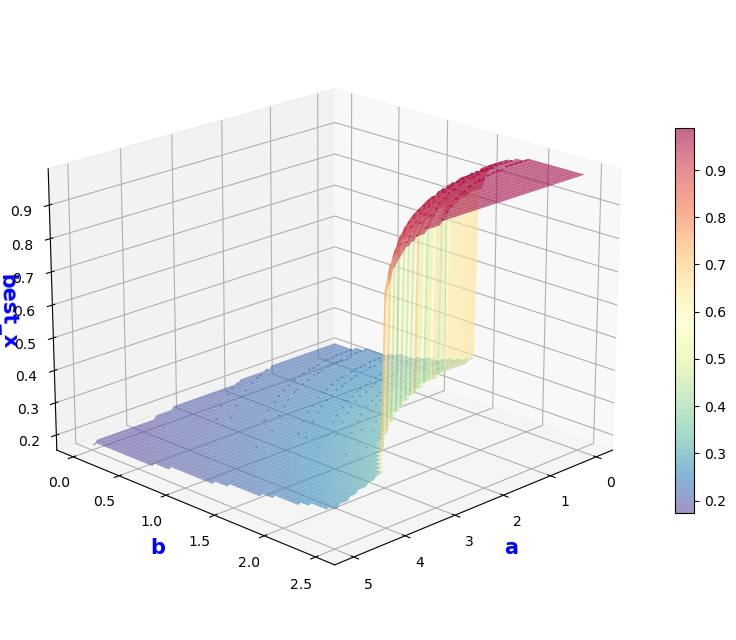

In [32]:
a_grid,b_grid = np.meshgrid(a_values,b_values)
best_x_grid = np.reshape(df1['best_x'].values,(100,100))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(a_grid, b_grid, best_x_grid, cmap='Spectral_r',alpha=0.6)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('a',fontdict=font1)
ax.set_ylabel('b',fontdict=font1)
ax.set_zlabel('best_x',fontdict=font1,labelpad=-2)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)

# Show or Save the Plot
plt.show()

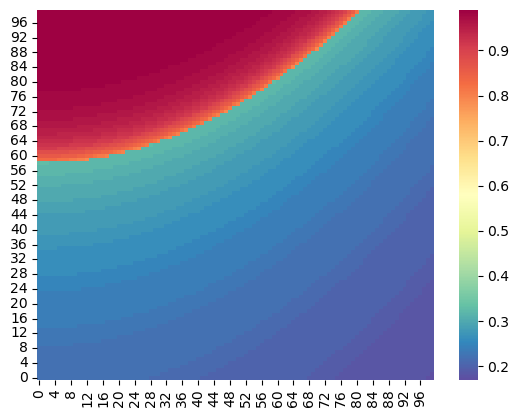

In [33]:
ax = sns.heatmap(best_x_grid,cmap='Spectral_r')
ax.invert_yaxis()

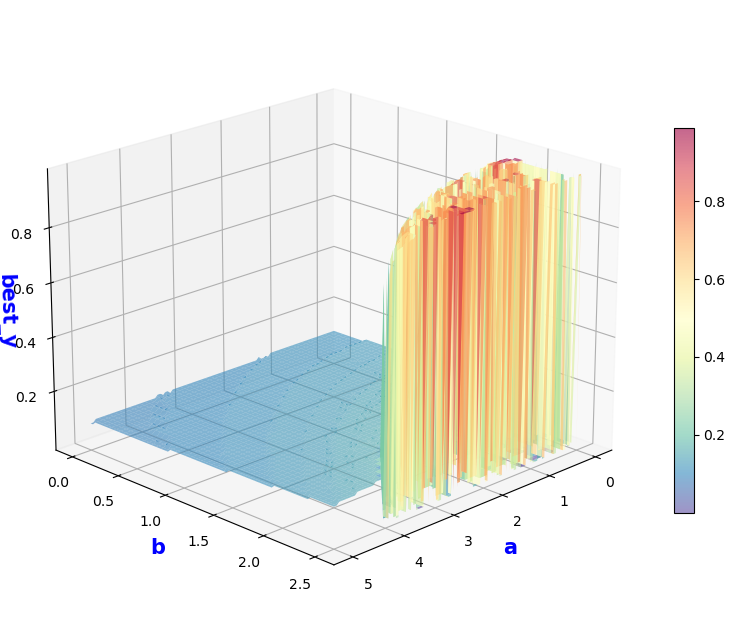

In [34]:
a_grid,b_grid = np.meshgrid(a_values,b_values)
best_y_grid = np.reshape(df1['best_y'].values,(100,100))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(a_grid, b_grid, best_y_grid, cmap='Spectral_r',alpha=0.6)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('a',fontdict=font1)
ax.set_ylabel('b',fontdict=font1)
ax.set_zlabel('best_y',fontdict=font1,labelpad=-2)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)

# Show or Save the Plot
plt.show()

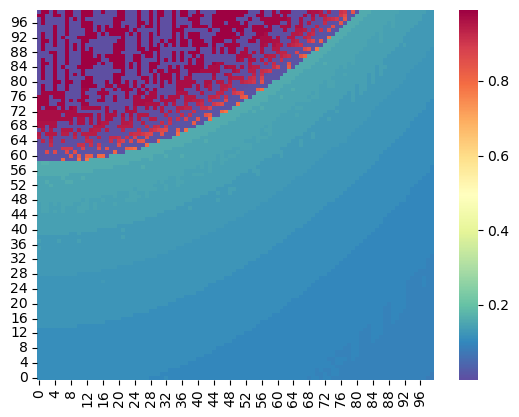

In [35]:
ax = sns.heatmap(best_y_grid,cmap='Spectral_r')
ax.invert_yaxis()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Parameters
initial_temperature = 100
cooling = 0.95  
x_upper_bound = 1
x_lower_bound = 0
y_upper_bound = 1
y_lower_bound = 0
epsilon = 0.01  # small value to exclude exact boundary values

def objective_function(solution, a, b):
    x, y = solution
    return -((2.18**2 + b**2)+(2.18 - 2.18**2)*x+(a - b**2)*y**2 + 
             (a - b**2)*(x-y)**2)+((1.0 - x)*np.log((1.0 - x)/10.0)+x*np.log(x)+
             y * np.log(y) + (x - y) * np.log(x - y) + 
             (2.18**2 * (1.0 - x) + b**2 * (1.0 - y**2 - (x - y)**2)) / 2.0)

# Update the neighbour generation to ensure it's within the new bounds and x > y
def neighbour(x, y):
    new_x = x + 0.1 * np.random.uniform(-1, 1)
    new_x = min(max(new_x, x_lower_bound + epsilon), x_upper_bound - epsilon)
    
    new_y = y + 0.1 * np.random.uniform(-1, 1)
    new_y = min(max(new_y, y_lower_bound + epsilon), new_x - epsilon)  # Ensure y < x

    return new_x, new_y

# Simulated Annealing function
def simulated_annealing(a, b):
    x = np.random.uniform(x_lower_bound + epsilon, x_upper_bound - epsilon)
    y = np.random.uniform(y_lower_bound + epsilon, min(x - epsilon, y_upper_bound - epsilon))
    best_x, best_y = x,y
    best_value = objective_function((best_x,best_y),a,b)
    current_temperature = initial_temperature
    
    while current_temperature > 0.1:
        new_x, new_y = neighbour(x, y)
        new_value = objective_function((new_x,new_y),a,b)
        delta_value = new_value - best_value
        
        if delta_value < 0:
            best_x, best_y, best_value = new_x, new_y, new_value
        elif np.random.random() < np.exp(-delta_value / current_temperature):
            best_x, best_y, best_value = new_x, new_y, new_value
        
        #print(current_temperature,new_x,new_y,new_value,delta_value)
        current_temperature *= cooling

    return best_x, best_y, best_value

# Loop over a and b values and run Simulated Annealing for each case again with updated bounds
a_values = np.linspace(0, 5, 100)
b_values = np.linspace(0, 2.5, 100)

best_x_list=[]
best_y_list=[]
best_value_list=[]
a_list = []
b_list = []

for a in tqdm(a_values):
    for b in b_values:
        best_x, best_y, best_value = simulated_annealing(a, b)
        best_x_list.append(best_x)
        best_y_list.append(best_y)
        best_value_list.append(best_value)
        a_list.append(a)
        b_list.append(b)


  0%|                                                                                                                                           | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_3802263/230090921.py:20: RuntimeWarning: divide by zero encountered in log
  y * np.log(y) + (x - y) * np.log(x - y) +
/tmp/ipykernel_3802263/230090921.py:20: RuntimeWarning: invalid value encountered in scalar multiply
  y * np.log(y) + (x - y) * np.log(x - y) +
 39%|██████████████████████████████████████████████████▋                                                                               | 39/100 [00:03<00:06,  9.83it/s]


KeyboardInterrupt: 

In [177]:
df2 = pd.DataFrame(a_list,columns=['a'])
df2['b'] = pd.DataFrame(b_list,columns=['b'])
df2['best_x'] = pd.DataFrame(best_x_list,columns=['best_x'])
df2['best_y'] = pd.DataFrame(best_y_list,columns=['best_y'])
df2['best_value'] = pd.DataFrame(best_value_list,columns=['best_value'])
df2

,a,b,best_x,best_y,best_value
0,0.0,0.000000,0.468545,0.079772,-4.768165
1,0.0,0.025253,0.424605,0.213657,-4.957833
2,0.0,0.050505,0.262259,0.117310,-5.131432
3,0.0,0.075758,0.912659,0.123774,-3.141300
4,0.0,0.101010,0.073432,0.027870,-5.003315
...,...,...,...,...,...
9995,5.0,2.398990,0.457988,0.236542,-7.999247
9996,5.0,2.424242,0.723676,0.163081,-7.721291
9997,5.0,2.449495,0.639496,0.290086,-7.873426
9998,5.0,2.474747,0.407880,0.232112,-8.206711


In [178]:
Z2 = np.reshape(df2['best_value'].values,(100,100))
Z2

array([[-4.76816546, -4.95783333, -5.13143224, ..., -4.35440328,
        -4.48402841, -7.45694899],
       [-3.91930998, -5.04894461, -5.00353449, ..., -8.04619923,
        -7.2477378 , -7.74486325],
       [-5.06401608, -4.33549515, -5.10979157, ..., -6.03000931,
        -7.98760101, -5.42168287],
       ...,
       [-6.20155715, -5.57260139, -6.77776306, ..., -8.12806777,
        -8.13081988, -8.31093629],
       [-6.2654819 , -5.6826782 , -5.81479714, ..., -8.10186208,
        -8.25793676, -8.0970479 ],
       [-5.30224125, -5.30744975, -5.26877574, ..., -7.87342587,
        -8.20671131, -8.27258335]])

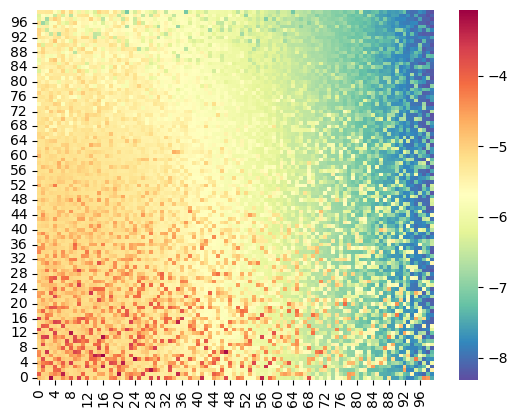

In [179]:
ax = sns.heatmap(Z2,cmap='Spectral_r')
ax.invert_yaxis()

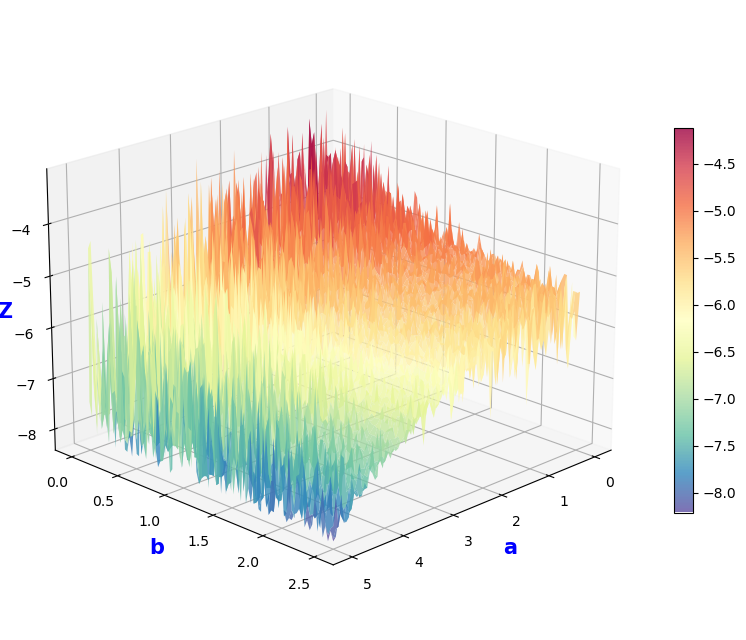

In [180]:
a_grid,b_grid = np.meshgrid(a_values,b_values)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(a_grid, b_grid, Z2, cmap='Spectral_r',alpha=0.8)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('a',fontdict=font1)
ax.set_ylabel('b',fontdict=font1)
ax.set_zlabel('Z',fontdict=font1,labelpad=-2)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)

# Show or Save the Plot
plt.show()

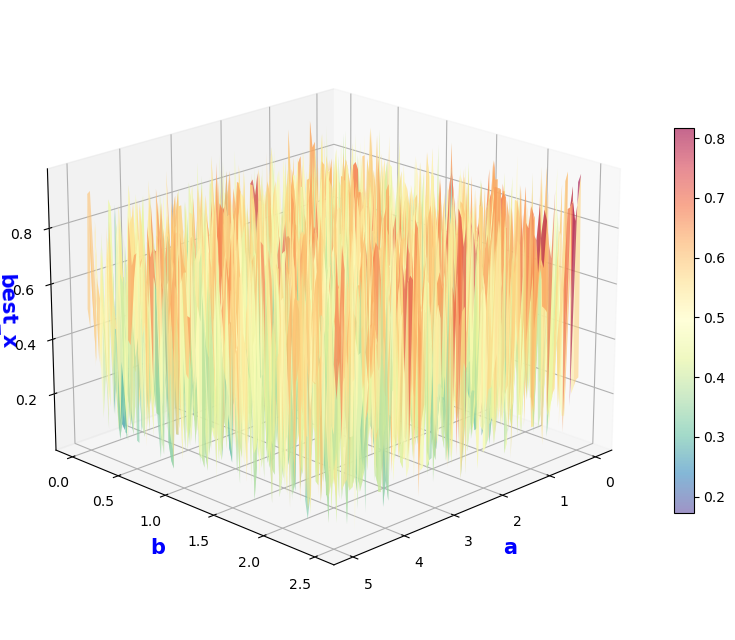

In [181]:
a_grid,b_grid = np.meshgrid(a_values,b_values)
best_x_grid = np.reshape(df2['best_x'].values,(100,100))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(a_grid, b_grid, best_x_grid, cmap='Spectral_r',alpha=0.6)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('a',fontdict=font1)
ax.set_ylabel('b',fontdict=font1)
ax.set_zlabel('best_x',fontdict=font1,labelpad=-2)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)

# Show or Save the Plot
plt.show()

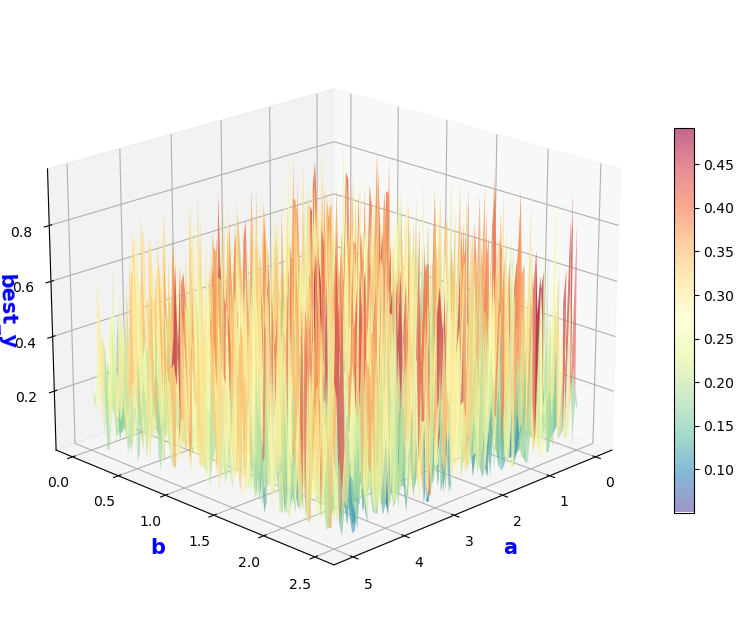

In [182]:
a_grid,b_grid = np.meshgrid(a_values,b_values)
best_y_grid = np.reshape(df2['best_y'].values,(100,100))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(a_grid, b_grid, best_y_grid, cmap='Spectral_r',alpha=0.6)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('a',fontdict=font1)
ax.set_ylabel('b',fontdict=font1)
ax.set_zlabel('best_y',fontdict=font1,labelpad=-2)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)

# Show or Save the Plot
plt.show()

<Axes: >

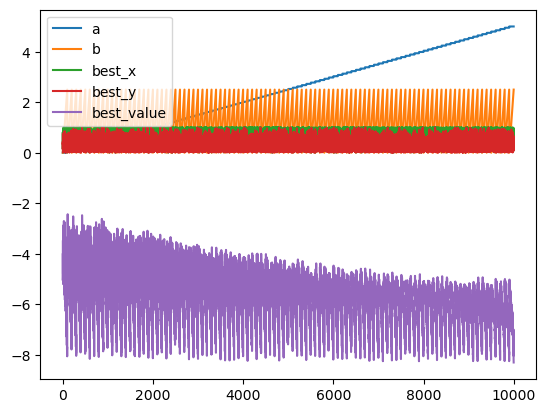

In [175]:
df.plot()

In [86]:
df.to_csv('simulated_anneling_results_updated.csv',index=False)

In [46]:
X>Y

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

In [48]:
x>y

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [35]:
np.isnan(Z)

array([[False, False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False],
       [ True,  True,  True, False, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True,  True, False, False, False],
       [ True,  True,  True,  True,  True,  True, False, False],
       [ True,  True,  True,  True,  True,  True,  True, False]])

In [36]:
np.nanmin(Z)

-5.144252654302014

In [50]:
y[np.where(Z==np.nanmin(Z))[1]]

array([0.2500005])

In [5]:
np.where(df['best_value']==df['best_value'].min())

(array([9999]),)

In [10]:
df['best_value'].min()

-8.205676983642146

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Parameters
initial_temperature = 100
cooling = 0.95  
upper_bound = 1
lower_bound = 0
epsilon = 1e-6  # small value to exclude exact boundary values

y = np.linspace(lower_bound+epsilon,upper_bound-epsilon,num=100,endpoint=False)
z = np.linspace(lower_bound+epsilon,upper_bound-epsilon,num=100,endpoint=False)
x = y + z + epsilon
X,Y,Z = np.meshgrid(x,y,z)

def objective_function(solution, a, b):
    x, y, z = solution
    return -((2.18**2 + b**2)+(2.18 - 2.18**2)*x+(a - b**2)*y**2 + 
             2*(a - b**2)*(y**2 + z**2 + y*z - x*(y+z)))+((1.0 - x)*np.log((1.0 - x)/10.0)+
             y * np.log(y) + z*np.log(z) + (x - y - z) * np.log(x - y - z) + 
             (2.18**2 * (1.0 - x) + b**2 * (1.0 - y**2 -z**2 - (x - y -z)**2)) / 2.0)
# Simulated Annealing function
def simulated_annealing(a, b):
    #best_x, best_y = x[0],y[0]
    #best_value = objective_function((best_x,best_y),a,b)
    #current_temperature = initial_temperature
    
    #while current_temperature > 0.1:
        new_value_grid = objective_function((X,Y,Z),a,b)
        new_value = np.nanmin(new_value_grid)
        #delta_value = new_value - best_value
        
        #if delta_value < 0 or np.random.random() < np.exp(delta_value / current_temperature):
        best_value = new_value
        best_x = x[np.where(new_value_grid==best_value)[2]][0]
        best_y = y[np.where(new_value_grid==best_value)[1]][0]
        best_z = z[np.where(new_value_grid==best_value)[0]][0]
        
        #current_temperature *= cooling

        return best_x, best_y, best_z, best_value


# Loop over a and b values and run Simulated Annealing for each case again with updated bounds
a_values = np.linspace(0, 5, 100)
b_values = np.linspace(0, 2.5, 100)

best_x_list=[]
best_y_list=[]
best_z_list=[]
best_value_list=[]
a_list = []
b_list = []

for a in tqdm(a_values):
    for b in b_values:
        best_x, best_y, best_z, best_value = simulated_annealing(a, b)
        best_x_list.append(best_x)
        best_y_list.append(best_y)
        best_z_list.append(best_z)
        best_value_list.append(best_value)
        a_list.append(a)
        b_list.append(b)

  0%|                                                                                                                                           | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_4051230/2302061814.py:22: RuntimeWarning: invalid value encountered in log
  2*(a - b**2)*(y**2 + z**2 + y*z - x*(y+z)))+((1.0 - x)*np.log((1.0 - x)/10.0)+
/tmp/ipykernel_4051230/2302061814.py:23: RuntimeWarning: invalid value encountered in log
  y * np.log(y) + z*np.log(z) + (x - y - z) * np.log(x - y - z) +
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [08:02<00:00,  4.83s/it]


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Parameters
initial_temperature = 100
cooling = 0.95  
upper_bound = 1
lower_bound = 0
epsilon = 1e-6  # small value to exclude exact boundary values

y = np.linspace(lower_bound+epsilon,upper_bound-epsilon,num=100,endpoint=False)
z = np.linspace(lower_bound+epsilon,upper_bound-epsilon,num=100,endpoint=False)
x = y + z + epsilon
X,Y,Z = np.meshgrid(x,y,z)

def objective_function(solution, a, b):
    x, y, z = solution
    return -((2.18**2 + b**2)+(2.18 - 2.18**2)*x+(a - b**2)*y**2 + 
             2*(a - b**2)*(y**2 + z**2 + y*z - x*(y+z)))+((1.0 - x)*np.log((1.0 - x)/10.0)+
             y * np.log(y) + z*np.log(z) + (x - y - z) * np.log(x - y - z) + 
             (2.18**2 * (1.0 - x) + b**2 * (1.0 - y**2 -z**2 - (x - y -z)**2)) / 2.0)
# Simulated Annealing function
def simulated_annealing(a, b):
    #best_x, best_y = x[0],y[0]
    #best_value = objective_function((best_x,best_y),a,b)
    #current_temperature = initial_temperature
    
    #while current_temperature > 0.1:
        new_value_grid = objective_function((X,Y,Z),a,b)
        new_value = np.nanmin(new_value_grid)
        #delta_value = new_value - best_value
        
        #if delta_value < 0 or np.random.random() < np.exp(delta_value / current_temperature):
        best_value = new_value
        best_x = x[np.where(new_value_grid==best_value)[2]][0]
        best_y = y[np.where(new_value_grid==best_value)[1]][0]
        best_z = z[np.where(new_value_grid==best_value)[0]][0]
        
        #current_temperature *= cooling

        return best_x, best_y, best_z, best_value

func = objective_function((X,Y,Z),3.0,0)
#best_x, best_y, best_z, best_value = simulated_annealing(2.5, 0)

/tmp/ipykernel_4051230/2873330893.py:22: RuntimeWarning: invalid value encountered in log
  2*(a - b**2)*(y**2 + z**2 + y*z - x*(y+z)))+((1.0 - x)*np.log((1.0 - x)/10.0)+
/tmp/ipykernel_4051230/2873330893.py:23: RuntimeWarning: invalid value encountered in log
  y * np.log(y) + z*np.log(z) + (x - y - z) * np.log(x - y - z) +


In [76]:
func[:,40,:].shape

(100, 100)

In [77]:
ax = sns.heatmap(func[:,40,:],cmap='Spectral_r')
ax.invert_yaxis()

AttributeError: 'QuadMesh' object has no attribute 'do_3d_projection'

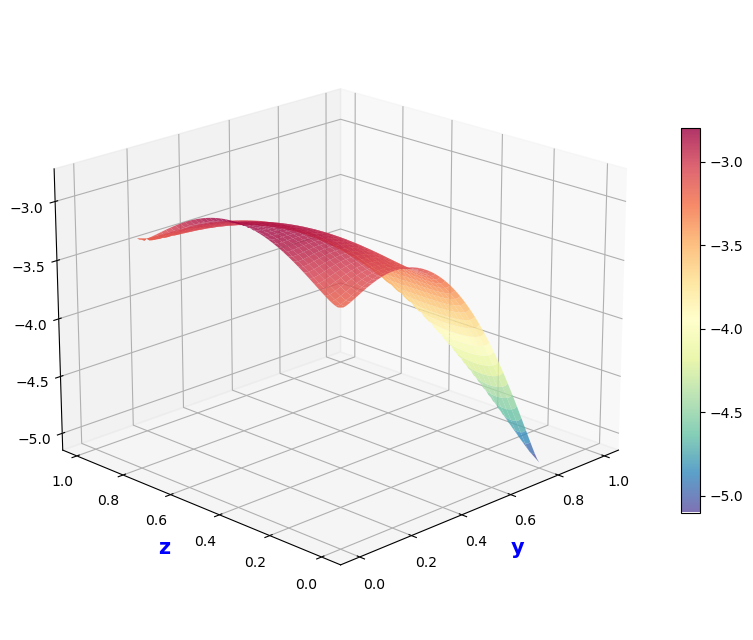

In [85]:
#%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Y[:,40,:], Z[:,40,:], func[:,40,:], cmap='Spectral_r',alpha=0.8)

# Customize the Plot
font1 = {'size':15,'weight':'bold','color':'blue'}
ax.set_xlabel('y',fontdict=font1)
ax.set_ylabel('z',fontdict=font1)
ax.set_zlabel('',fontdict=font1,labelpad=-2)
fig.colorbar(surf, shrink=0.5)
ax.view_init(elev=20, azim=45)
ax.invert_yaxis()
ax.invert_xaxis()
# Show or Save the Plot
plt.show()

In [60]:
X[0,:,0]

array([3.00000000e-06, 2.00029600e-02, 4.00029200e-02, 6.00028800e-02,
       8.00028400e-02, 1.00002800e-01, 1.20002760e-01, 1.40002720e-01,
       1.60002680e-01, 1.80002640e-01, 2.00002600e-01, 2.20002560e-01,
       2.40002520e-01, 2.60002480e-01, 2.80002440e-01, 3.00002400e-01,
       3.20002360e-01, 3.40002320e-01, 3.60002280e-01, 3.80002240e-01,
       4.00002200e-01, 4.20002160e-01, 4.40002120e-01, 4.60002080e-01,
       4.80002040e-01, 5.00002000e-01, 5.20001960e-01, 5.40001920e-01,
       5.60001880e-01, 5.80001840e-01, 6.00001800e-01, 6.20001760e-01,
       6.40001720e-01, 6.60001680e-01, 6.80001640e-01, 7.00001600e-01,
       7.20001560e-01, 7.40001520e-01, 7.60001480e-01, 7.80001440e-01,
       8.00001400e-01, 8.20001360e-01, 8.40001320e-01, 8.60001280e-01,
       8.80001240e-01, 9.00001200e-01, 9.20001160e-01, 9.40001120e-01,
       9.60001080e-01, 9.80001040e-01, 1.00000100e+00, 1.02000096e+00,
       1.04000092e+00, 1.06000088e+00, 1.08000084e+00, 1.10000080e+00,
      

In [61]:
X[:,40,:]

array([[0.8000014, 0.8000014, 0.8000014, ..., 0.8000014, 0.8000014,
        0.8000014],
       [0.8000014, 0.8000014, 0.8000014, ..., 0.8000014, 0.8000014,
        0.8000014],
       [0.8000014, 0.8000014, 0.8000014, ..., 0.8000014, 0.8000014,
        0.8000014],
       ...,
       [0.8000014, 0.8000014, 0.8000014, ..., 0.8000014, 0.8000014,
        0.8000014],
       [0.8000014, 0.8000014, 0.8000014, ..., 0.8000014, 0.8000014,
        0.8000014],
       [0.8000014, 0.8000014, 0.8000014, ..., 0.8000014, 0.8000014,
        0.8000014]])

In [44]:
Y[:,11,:]

array([[1.0000000e-06, 1.0000000e-06, 1.0000000e-06, ..., 1.0000000e-06,
        1.0000000e-06, 1.0000000e-06],
       [1.0000980e-02, 1.0000980e-02, 1.0000980e-02, ..., 1.0000980e-02,
        1.0000980e-02, 1.0000980e-02],
       [2.0000960e-02, 2.0000960e-02, 2.0000960e-02, ..., 2.0000960e-02,
        2.0000960e-02, 2.0000960e-02],
       ...,
       [9.6999906e-01, 9.6999906e-01, 9.6999906e-01, ..., 9.6999906e-01,
        9.6999906e-01, 9.6999906e-01],
       [9.7999904e-01, 9.7999904e-01, 9.7999904e-01, ..., 9.7999904e-01,
        9.7999904e-01, 9.7999904e-01],
       [9.8999902e-01, 9.8999902e-01, 9.8999902e-01, ..., 9.8999902e-01,
        9.8999902e-01, 9.8999902e-01]])

In [45]:
Z[:,11,:]

array([[1.0000000e-06, 1.0000980e-02, 2.0000960e-02, ..., 9.6999906e-01,
        9.7999904e-01, 9.8999902e-01],
       [1.0000000e-06, 1.0000980e-02, 2.0000960e-02, ..., 9.6999906e-01,
        9.7999904e-01, 9.8999902e-01],
       [1.0000000e-06, 1.0000980e-02, 2.0000960e-02, ..., 9.6999906e-01,
        9.7999904e-01, 9.8999902e-01],
       ...,
       [1.0000000e-06, 1.0000980e-02, 2.0000960e-02, ..., 9.6999906e-01,
        9.7999904e-01, 9.8999902e-01],
       [1.0000000e-06, 1.0000980e-02, 2.0000960e-02, ..., 9.6999906e-01,
        9.7999904e-01, 9.8999902e-01],
       [1.0000000e-06, 1.0000980e-02, 2.0000960e-02, ..., 9.6999906e-01,
        9.7999904e-01, 9.8999902e-01]])

In [9]:
df2 = pd.DataFrame(a_list,columns=['a'])
df2['b'] = pd.DataFrame(b_list,columns=['b'])
df2['best_x'] = pd.DataFrame(best_x_list,columns=['best_x'])
df2['best_y'] = pd.DataFrame(best_y_list,columns=['best_y'])
df2['best_z'] = pd.DataFrame(best_y_list,columns=['best_z'])
df2['best_value'] = pd.DataFrame(best_value_list,columns=['best_value'])
df2

,a,b,best_x,best_y,best_z,best_value
0,0.0,0.000000,0.140003,0.100001,0.100001,-4.898644
1,0.0,0.025253,0.140003,0.100001,0.100001,-4.898982
2,0.0,0.050505,0.140003,0.100001,0.100001,-4.899995
3,0.0,0.075758,0.140003,0.100001,0.100001,-4.901684
4,0.0,0.101010,0.140003,0.100001,0.100001,-4.904048
...,...,...,...,...,...,...
9995,5.0,2.398990,0.040003,0.470000,0.470000,-8.015425
9996,5.0,2.424242,0.040003,0.480000,0.480000,-8.134745
9997,5.0,2.449495,0.060003,0.480000,0.480000,-8.258250
9998,5.0,2.474747,0.060003,0.480000,0.480000,-8.384440


In [79]:
df2

,a,b,best_x,best_y,best_z,best_value
0,0.0,0.000000,0.140003,0.100001,0.100001,-4.898644
1,0.0,0.025253,0.140003,0.100001,0.100001,-4.898982
2,0.0,0.050505,0.140003,0.100001,0.100001,-4.899995
3,0.0,0.075758,0.140003,0.100001,0.100001,-4.901684
4,0.0,0.101010,0.140003,0.100001,0.100001,-4.904048
...,...,...,...,...,...,...
9995,5.0,2.398990,0.040003,0.470000,0.470000,-8.015425
9996,5.0,2.424242,0.040003,0.480000,0.480000,-8.134745
9997,5.0,2.449495,0.060003,0.480000,0.480000,-8.258250
9998,5.0,2.474747,0.060003,0.480000,0.480000,-8.384440


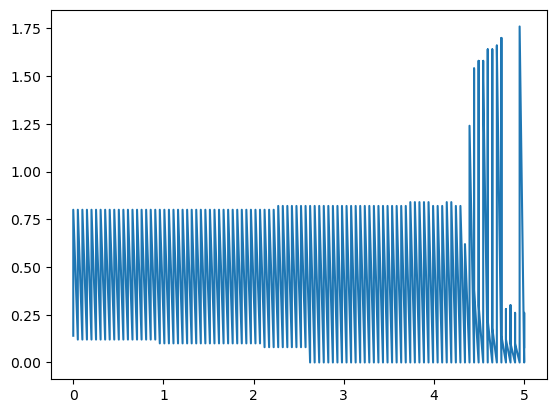

In [87]:
%matplotlib inline
plt.plot(df2['a'],df2['best_x'])
plt.show()

In [6]:
trans_rows = []
j=0
for i in range(1,df2.shape[0]):
    if abs(df2['best_x'][i] - df2['best_x'][i-1]) >=0.45:
        j= j+1
        if j==1: 
            trans_rows.append(i)
        elif(j>1) & (df2['b'][i-1]!=2.5):
            trans_rows.append(i-1)

In [7]:
df_trans = df2.loc[trans_rows].copy()
df_trans

,a,b,best_x,best_y,best_value
100,0.050505,0.000000,0.120003,0.100001,-4.897548
8798,4.393939,2.474747,0.400002,0.470000,-8.522721
8892,4.444444,2.323232,0.460002,0.300000,-7.739866
8895,4.444444,2.398990,1.480000,0.460000,-8.099380
8992,4.494949,2.323232,0.440002,0.280000,-7.729807
8994,4.494949,2.373737,1.580000,0.460000,-7.962243
9092,4.545455,2.323232,0.400002,0.260000,-7.721066
9093,4.545455,2.348485,1.580000,0.450000,-7.832504
9094,4.545455,2.373737,0.120003,0.460000,-7.952080
9095,4.545455,2.398990,1.580000,0.460000,-8.075344


Text(0.5, 1.0, 'phaseline twostate')

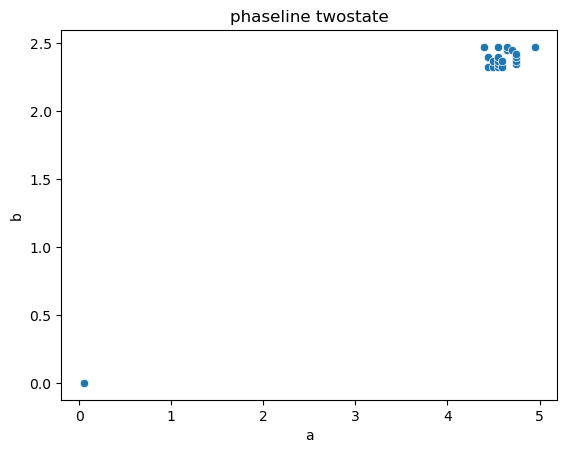

In [8]:
sns.scatterplot(x=df_trans['a'],y=df_trans['b'])
plt.title('phaseline twostate')

In [ ]:
df2

In [71]:
df2.to_csv('3state.csv',sep='\t')

In [59]:
H = objective_function((X,Y,Z),0,0)

/tmp/ipykernel_3802263/1874666103.py:22: RuntimeWarning: invalid value encountered in log
  2*(a - b**2)*(y**2 + z**2 + y*z - x*(y+z)))+((1.0 - x)*np.log((1.0 - x)/10.0)+
/tmp/ipykernel_3802263/1874666103.py:23: RuntimeWarning: invalid value encountered in log
  y * np.log(y) + z*np.log(z) + (x - y - z) * np.log(x - y - z) +


In [60]:
H

array([[[-4.67882204,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-4.72687443, -4.74072783, -4.72687443, ...,         nan,
                 nan,         nan],
        [-4.74680301, -4.76928645, -4.77451864, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-4.74072783, -4.74072783,         nan, ...,         nan,
                 nan,         nan],
        [-4.76928645, -4.78837203, -4.78837203, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  

In [62]:
np.nanmin(H)

-4.898643936315771

In [61]:
np.where(H==np.nanmin(H))

(array([6, 7, 7]), array([10, 10, 10]), array([7, 6, 7]))

In [67]:
objective_function((x[7],y[7],z[6]),0,0)

-4.8596694814314745